# Gaussian Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from numpy.random import multivariate_normal, seed, randn
from sklearn.preprocessing import PolynomialFeatures

In [2]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(precision=3, suppress=True)

In [3]:
x = np.linspace(-1, 1, 100)

## The prior function $y$
---
## Directly Defining the kernel Matrix

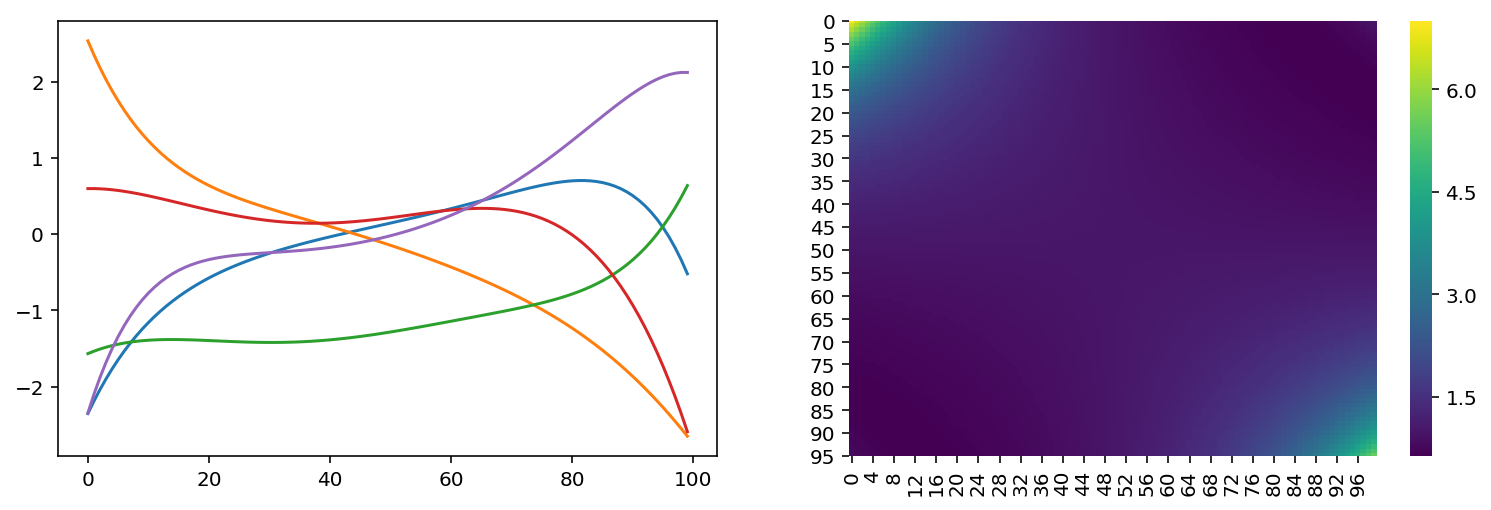

In [4]:
seed(314)
E = np.zeros_like(x)
phi = PolynomialFeatures(degree=6).fit_transform(x[:, np.newaxis])
Phi = phi @ phi.T

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].plot(np.random.multivariate_normal(E, Phi, size=5).T)
sns.heatmap(Phi, cmap="viridis", ax=ax[1]);

## Indirectly Defining the kernel Matrix

### Gaussian Kernel Process

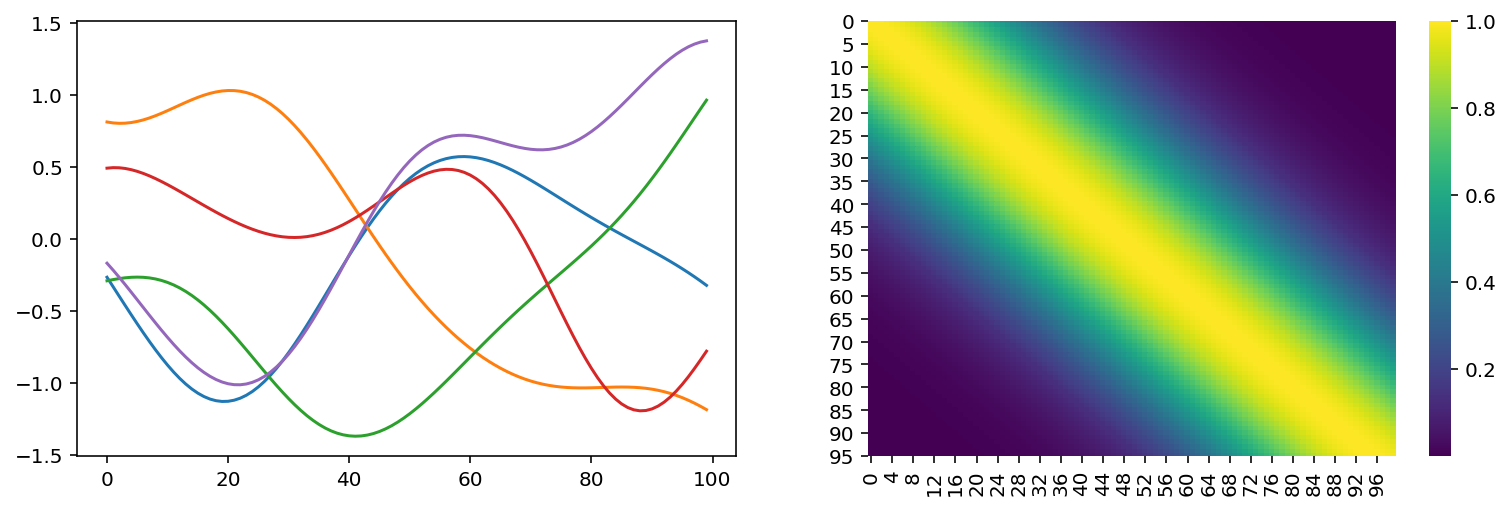

In [5]:
seed(314)
sigma = 0.2
E = np.zeros_like(x)
K = np.exp(-(x[:, np.newaxis] - x[np.newaxis, :])**2 / (2 * sigma))

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].plot(np.random.multivariate_normal(E, K, size=5).T)
sns.heatmap(K, cmap="viridis", ax=ax[1]);

### Ornstein-Uhlenbeck Process

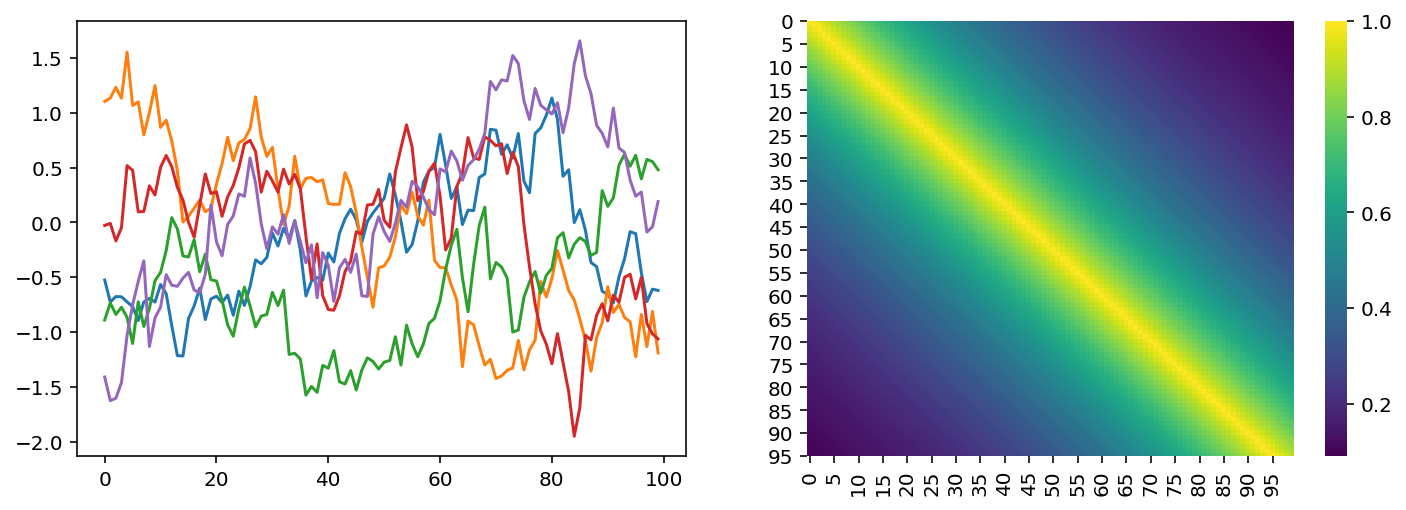

In [6]:
seed(314)
theta = 1.2
K = np.exp(-theta * np.abs(x[:, np.newaxis] - x[np.newaxis, :]))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.random.multivariate_normal(E, K, size=5).T)
sns.heatmap(K, cmap="viridis", ax=ax[1]);

### One widely used kernel function

$$
    k({\bf x}_n, {\bf x}_m) = \theta_0 \exp\left(-\frac{\theta_1}{2}||{\bf x}_n - {\bf x}_m||^2\right) + \theta_2 + \theta_3 {\bf x}_n^T{\bf x}_m
$$

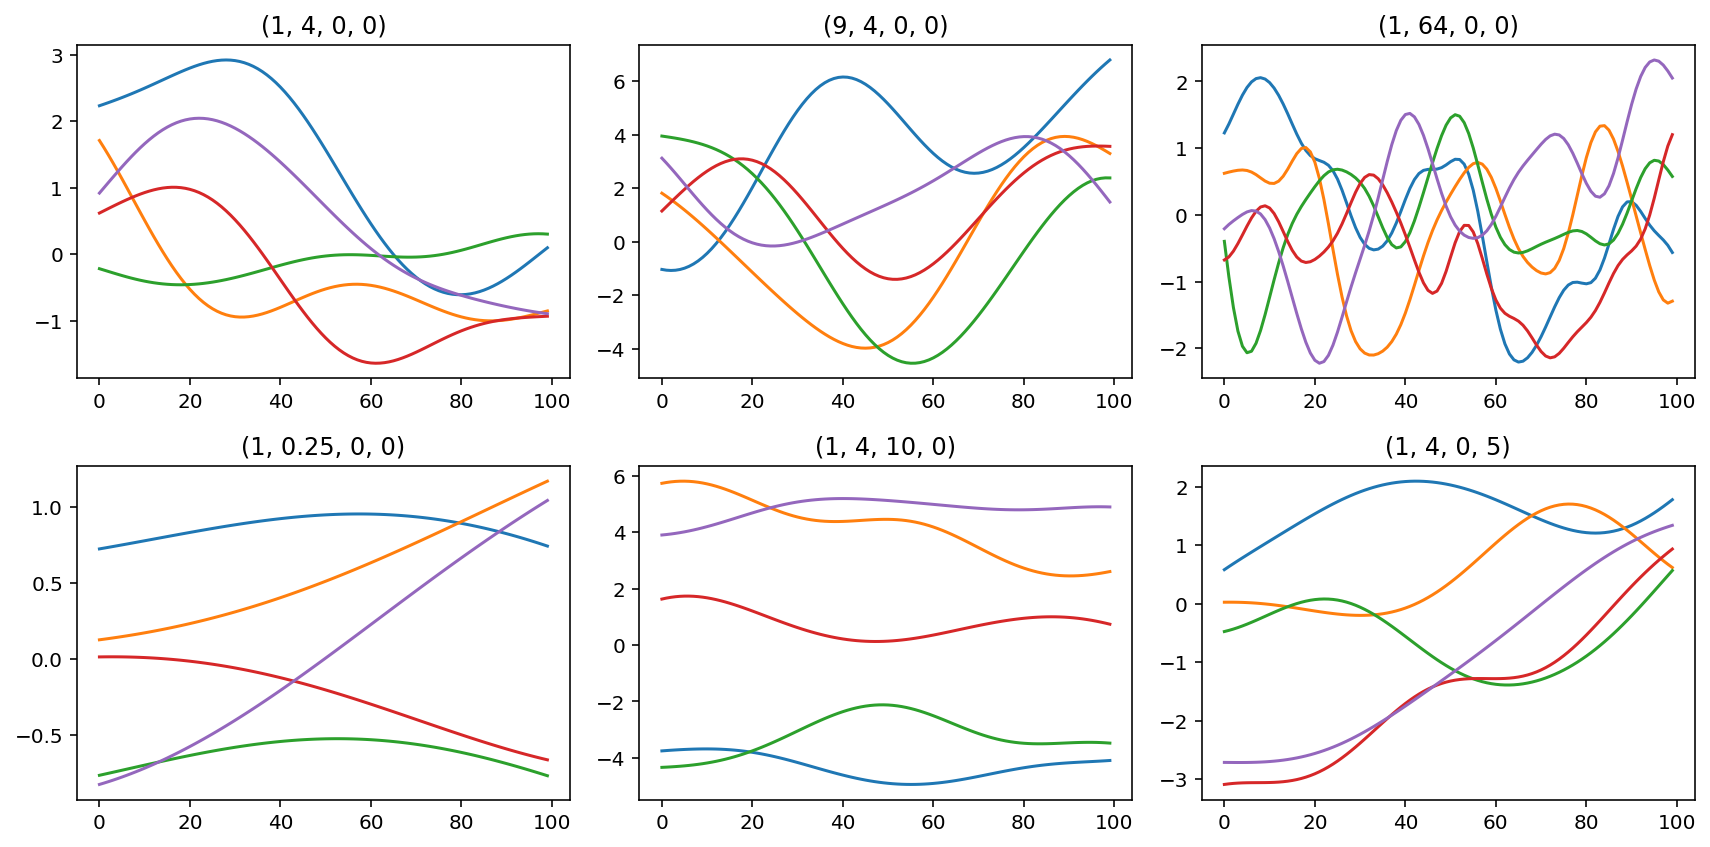

In [7]:
T_collection = [(1, 4, 0, 0), (9, 4, 0, 0), (1, 64, 0, 0),
                (1, 0.25, 0, 0), (1, 4, 10, 0), (1, 4, 0, 5)]

seed(1643)
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.ravel()
for axi, (t0, t1, t2, t3) in zip(ax, T_collection):
    K = t0 * np.exp(-t1 / 2 * (x[:, np.newaxis] - x[np.newaxis, :]) ** 2) + t2 + t3 * x[:, np.newaxis] * x[np.newaxis, :]
    axi.plot(np.random.multivariate_normal(E, K, size=5).T)
    axi.set_title(f"({t0}, {t1}, {t2}, {t3})")
plt.tight_layout()

# Prior and Posterior Gaussian Processes

In [8]:
seed(1643)
xtest = np.linspace(0, 1.3, 100)
E = np.zeros_like(xtest)
sigma = 0.05
K_prior = np.exp(-(xtest[:, np.newaxis] - xtest[np.newaxis, :])**2 / (2 * sigma))

In [9]:
x = np.array([0.1, 0.2, 0.25, 0.8, 0.9])
y = np.array([1.3, 1.1, 0.9, 0.85, 0.6])[:, np.newaxis]

In [10]:
beta_inv = 0.01
CN = x[:, np.newaxis] - x[np.newaxis, :]
CN = np.exp(-CN ** 2 / (2 * sigma)) + np.eye(len(CN)) * beta_inv

In [11]:
K = x[:, np.newaxis] - xtest[np.newaxis, :]
K = np.exp(-K ** 2 / (2 * sigma))

In [12]:
Kv = xtest[:, np.newaxis] - xtest[np.newaxis, :]
Kv = np.exp(-Kv ** 2 / (2 * sigma))

In [13]:
mu_post = K.T @ inv(CN) @ y
sigma_post = Kv - K.T @ inv(CN) @ K 

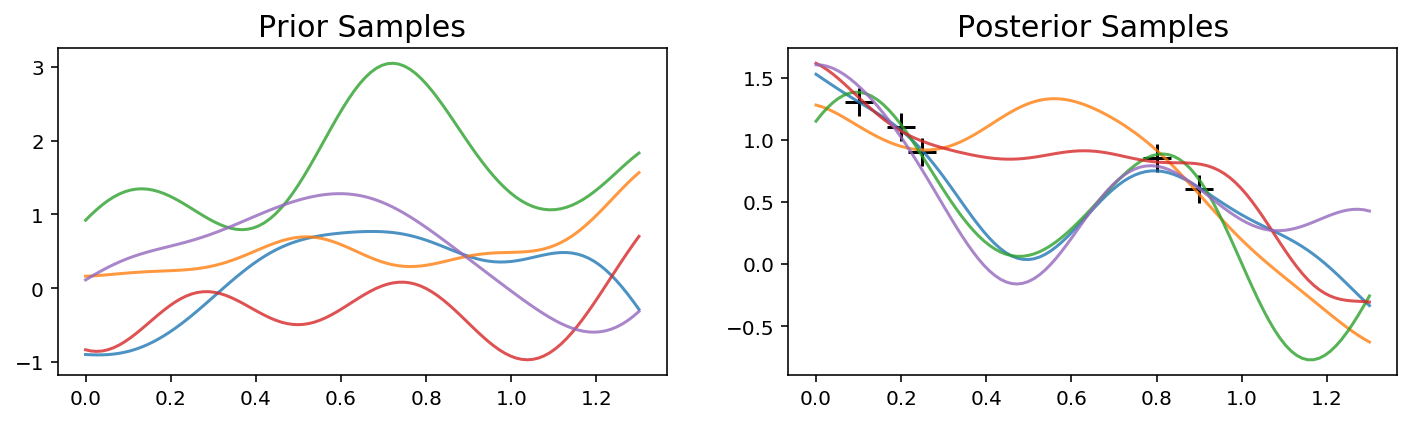

In [14]:
seed(314)
posterior_sample = np.random.multivariate_normal(mu_post.ravel(), sigma_post, size=5)
prior_sample = np.random.multivariate_normal(E, K_prior, size=5)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(xtest, prior_sample.T, alpha=0.8);
ax[1].plot(xtest, posterior_sample.T, alpha=0.8);
ax[1].scatter(x, y, marker="+", s=200, c="black")
ax[0].set_title("Prior Samples", fontsize=15)
ax[1].set_title("Posterior Samples", fontsize=15);

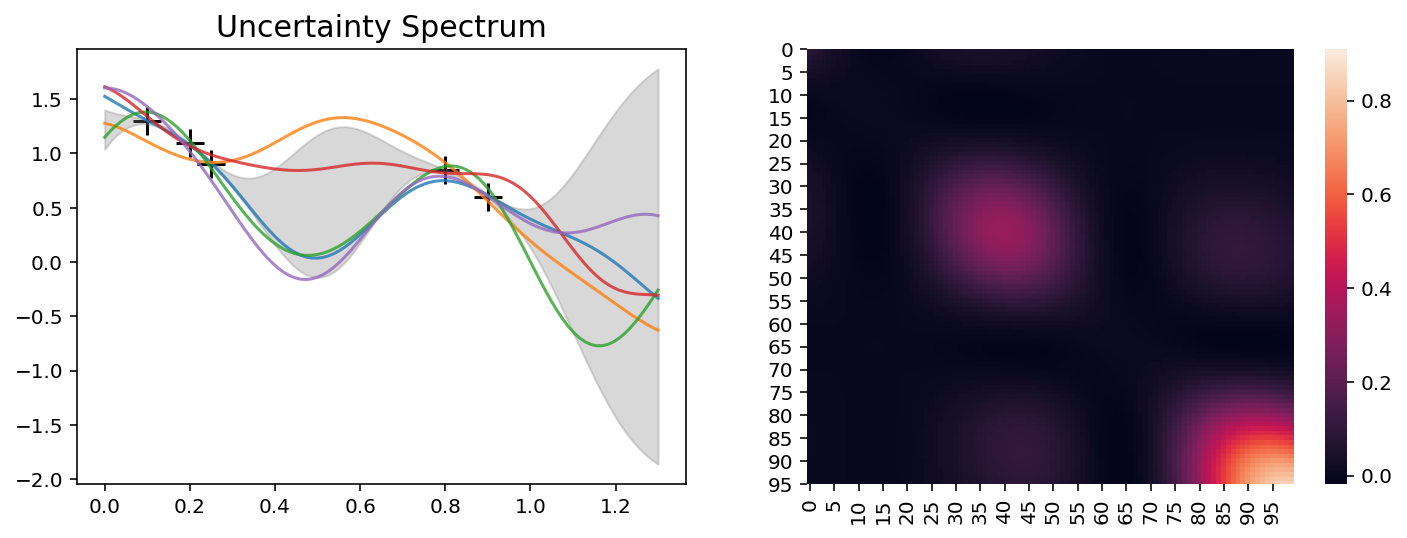

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

upper_bound = mu_post.ravel() + 2 * np.diag(sigma_post)
lower_bound = mu_post.ravel() - 2 * np.diag(sigma_post)
ax[0].scatter(x, y, marker="+", s=200, c="black")
ax[0].fill_between(xtest, upper_bound, lower_bound, color="tab:gray", alpha=0.3)
ax[0].plot(xtest, posterior_sample.T, alpha=0.8)
ax[0].set_title("Uncertainty Spectrum", fontsize=15);
sns.heatmap(sigma_post, ax=ax[1])